In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [2]:
diabetes = pd.DataFrame(pd.read_csv("diabetes.csv"))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = diabetes.iloc[:, 0:8].values 
Y = diabetes.iloc[:, 8].values

In [4]:
X[0:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [5]:
## Problem 1 ##

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = np.random)

In [7]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [9]:
Y_pred = classifier.predict(X_test)

In [10]:
Y_pred[0:9]

array([1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[81, 13],
       [27, 33]], dtype=int64)

In [12]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.7402597402597403
Precision: 0.717391304347826
Recall: 0.55


Text(0.5, 257.44, 'Predicted label')

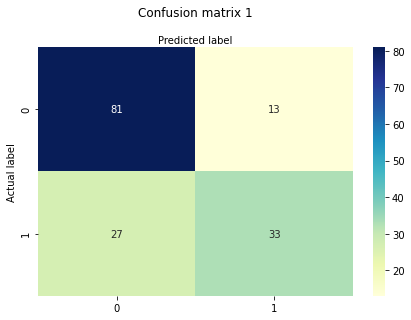

In [13]:
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix 1', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [14]:
## Problem 2 ##

In [15]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, Y_train)

GaussianNB()

In [16]:
Y2_pred  =  classifier.predict(X_test) 

In [17]:
Y2_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score 
cm = confusion_matrix(Y_test, Y2_pred)
cm

array([[81, 13],
       [25, 35]], dtype=int64)

In [19]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y2_pred))
print("Precision:",metrics.precision_score(Y_test, Y2_pred))
print("Recall:",metrics.recall_score(Y_test, Y2_pred))

Accuracy: 0.7532467532467533
Precision: 0.7291666666666666
Recall: 0.5833333333333334


Text(0.5, 257.44, 'Predicted label')

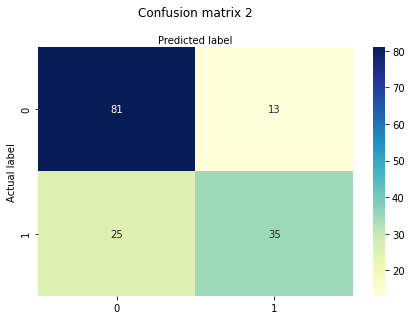

In [20]:
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix 2', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [21]:
## Problem 3 ##

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
metrics = ['accuracy', 'precision', 'recall']
k5_1 = KFold(n_splits=5, random_state=1, shuffle=True)
k10_1 = KFold(n_splits=10, random_state=1, shuffle=True)
scores5_1 = cross_validate(lr, X_train, Y_train, scoring=metrics, cv=k5_1, n_jobs=-1)
scores10_1 = cross_validate(lr, X_train, Y_train, scoring=metrics, cv=k10_1, n_jobs=-1)
sorted(scores5_1.keys())
['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']
sorted(scores10_1.keys())
['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

In [23]:
print("K = 5")
print("Accuracy:",np.mean(scores5_1['test_accuracy']))
print("Precision:",np.mean(scores5_1['test_precision']))
print("Recall:",np.mean(scores5_1['test_recall']))

K = 5
Accuracy: 0.7703052112488338
Precision: 0.7153861192570871
Recall: 0.5439828606324659


In [24]:
print("K = 10")
print("Accuracy:",np.mean(scores10_1['test_accuracy']))
print("Precision:",np.mean(scores10_1['test_precision']))
print("Recall:",np.mean(scores10_1['test_recall']))

K = 10
Accuracy: 0.7769169751454257
Precision: 0.7255430242272348
Recall: 0.559557984286245


In [25]:
## Problem 4 ##

In [26]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
metrics = ['accuracy', 'precision', 'recall']
k5_2 = KFold(n_splits=5, random_state=1, shuffle=True)
k10_2 = KFold(n_splits=10, random_state=1, shuffle=True)
scores5_2 = cross_validate(gb, X_train, Y_train, scoring=metrics, cv=k5_2, n_jobs=-1)
scores10_2 = cross_validate(gb, X_train, Y_train, scoring=metrics, cv=k10_2, n_jobs=-1)
sorted(scores5_2.keys())
['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']
sorted(scores10_2.keys())
['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

In [27]:
print("K = 5")
print("Accuracy:",np.mean(scores5_2['test_accuracy']))
print("Precision:",np.mean(scores5_2['test_precision']))
print("Recall:",np.mean(scores5_2['test_recall']))

K = 5
Accuracy: 0.7556444089031055
Precision: 0.6546389287422286
Recall: 0.6004574788244792


In [28]:
print("K = 10")
print("Accuracy:",np.mean(scores10_2['test_accuracy']))
print("Precision:",np.mean(scores10_2['test_precision']))
print("Recall:",np.mean(scores10_2['test_recall']))

K = 10
Accuracy: 0.7606292966684294
Precision: 0.6697937218365607
Recall: 0.6003783113022243
